In [1]:
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm
from scipy.stats import zipf

from P3.utils import draw_network

plt.style.use('seaborn-v0_8-darkgrid')

## Normal Distribution Histogram with Sigma Intervals

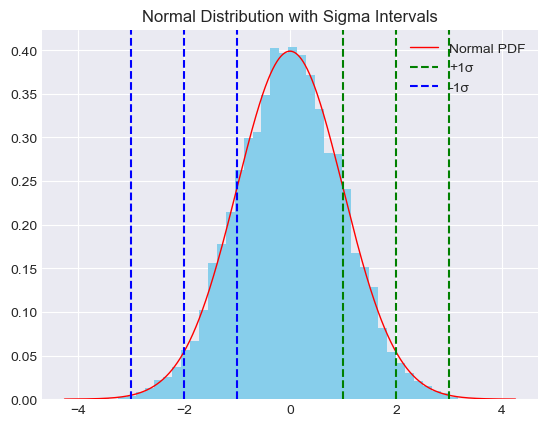

In [2]:
mu, sigma = 0, 1
data = np.random.normal(mu, sigma, 10000)

plt.hist(data, bins=50, density=True, color='skyblue')
x_range = max(abs(data))
x = np.linspace(-x_range, x_range, 1000)
plt.plot(x, norm.pdf(x, mu, sigma), 'r-', lw=1, label='Normal PDF')

# intervals
for i in range(1, 4):
    plt.axvline(mu + i * sigma, color='green', linestyle='--', label=f'+{i}σ' if i == 1 else None)
    plt.axvline(mu - i * sigma, color='blue', linestyle='--', label=f'-{i}σ' if i == 1 else None)

plt.legend()
plt.title("Normal Distribution with Sigma Intervals")
plt.show()

## Pareto Rule for Geometric Distribution

In [3]:
def pareto_rule(data, title):
    # sort
    sorted_data = np.sort(data)[::-1]
    cum_sum = np.cumsum(sorted_data)
    cum_sum /= cum_sum[-1]

    # 80/20 rule
    top_20 = int(0.2 * len(data))
    contrib_top_20 = cum_sum[top_20]

    print(f"Top 20% contribute {contrib_top_20*100:.2f}% of the total value")

    # plot cumulative sum
    plt.plot(np.linspace(0, 1, len(data)), cum_sum)
    plt.axvline(0.2, color='red', linestyle='--', label='Top 20% Population')
    plt.axhline(contrib_top_20, color='green', linestyle='--', label=f'{contrib_top_20:.2%} Value Share')
    plt.axhline(0.8, color='purple', linestyle='--', label=f'80% Value Share')
    plt.legend()
    plt.title(title)
    plt.xlabel("Fraction of Population")
    plt.ylabel("Fraction of Total Value")
    plt.show()

Top 20% contribute 46.75% of the total value


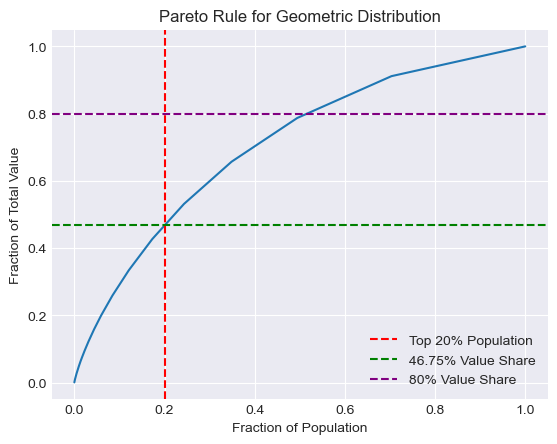

In [4]:
p = 0.3
size = 10000
data = np.random.geometric(p, size).astype(float)
pareto_rule(data, title="Pareto Rule for Geometric Distribution")

## Power-Law Distribution Histogram

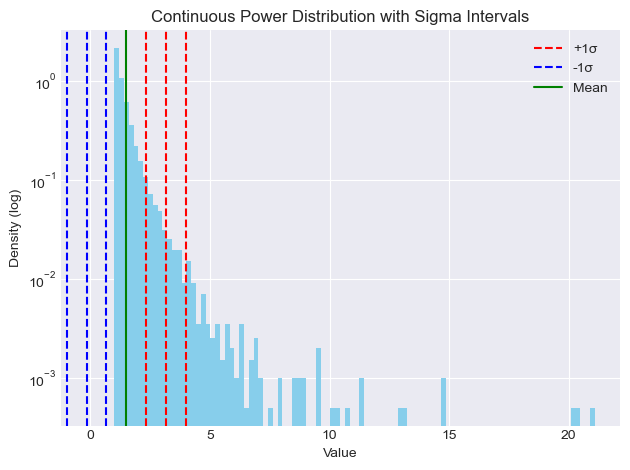

In [6]:
a = 3.0  #alpha
size = 10000
samples = np.random.pareto(a, size) + 1

mean = np.mean(samples)
std = np.std(samples)

plt.hist(samples, bins=100, color='skyblue', density=True)
plt.title("Continuous Power Distribution with Sigma Intervals")
plt.xlabel("Value")
plt.ylabel("Density (log)")

# intervals
for i in range(1, 4):
    plt.axvline(mean + i * std, color='red', linestyle='--', label=f'+{i}σ' if i == 1 else None)
    plt.axvline(mean - i * std, color='blue', linestyle='--', label=f'-{i}σ' if i == 1 else None)

# plot mean
plt.yscale('log')
plt.axvline(mean, color='green', linestyle='-', label='Mean')
plt.legend()
plt.tight_layout()
plt.show()

## Pareto Rule for Zeta Distribution

Top 20% contribute 55.48% of the total value


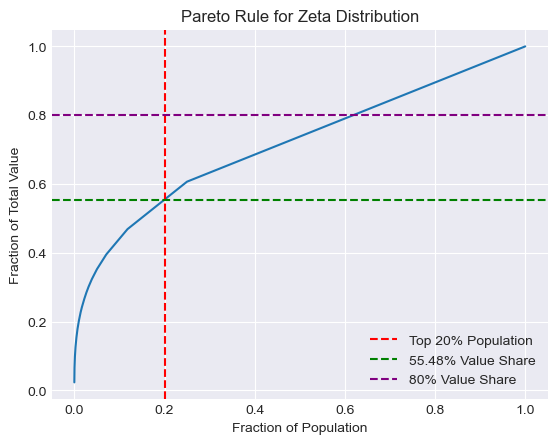

In [7]:
a = 2.5
n_samples = 10000

data = zipf.rvs(a, size=n_samples).astype(float)

pareto_rule(data, title="Pareto Rule for Zeta Distribution")


## BA vs ER Networks

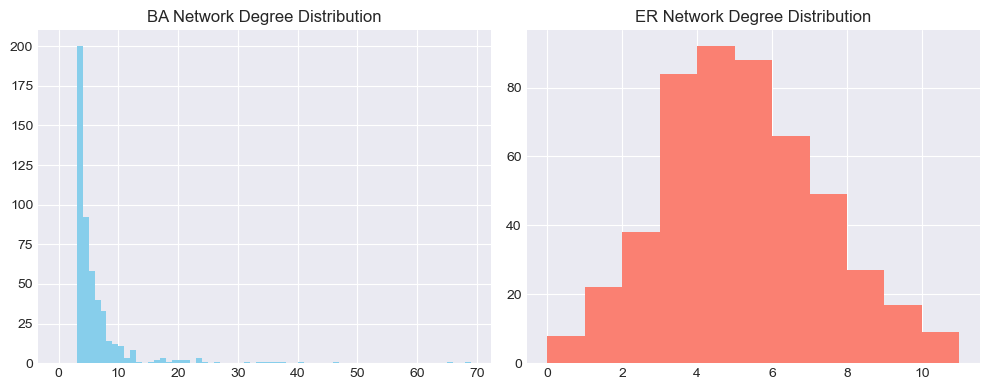

BA: mean=5.96, var=43.23
ER: mean=4.72, var=4.66


In [9]:
n = 500
m = 3
p = 0.01
G_ba = nx.barabasi_albert_graph(n, m)
G_er = nx.erdos_renyi_graph(n, p)

# degrees
deg_ba = [d for _, d in G_ba.degree()]
deg_er = [d for _, d in G_er.degree()]

# plot
plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
plt.hist(deg_ba, bins=range(max(deg_ba)+1), color='skyblue')
plt.title("BA Network Degree Distribution")

plt.subplot(1,2,2)
plt.hist(deg_er, bins=range(max(deg_er)+1), color='salmon')
plt.title("ER Network Degree Distribution")
plt.tight_layout()
plt.show()

# statistics
mean_ba, var_ba = np.mean(deg_ba), np.var(deg_ba)
mean_er, var_er = np.mean(deg_er), np.var(deg_er)
print(f"BA: mean={mean_ba:.2f}, var={var_ba:.2f}")
print(f"ER: mean={mean_er:.2f}, var={var_er:.2f}")


# clusters: 20


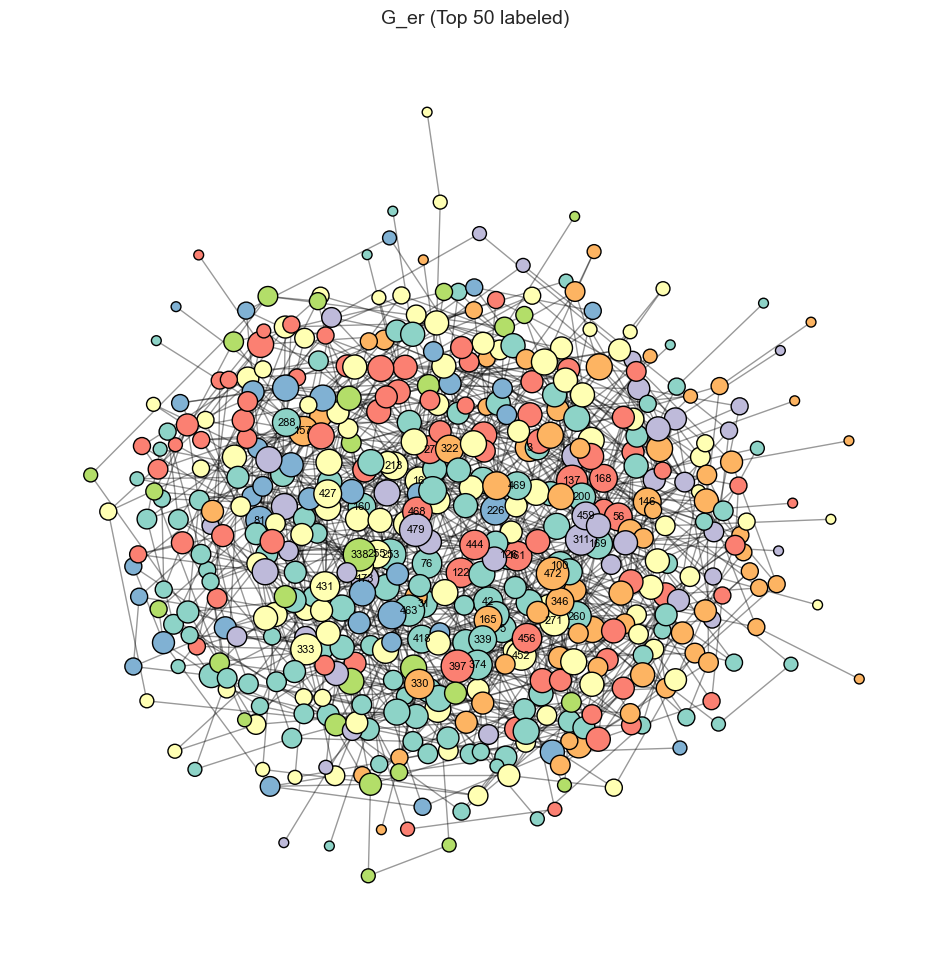

In [10]:
pos = nx.kamada_kawai_layout(G_er)
draw_network(G_er, "G_er", pos=pos)

# clusters: 11


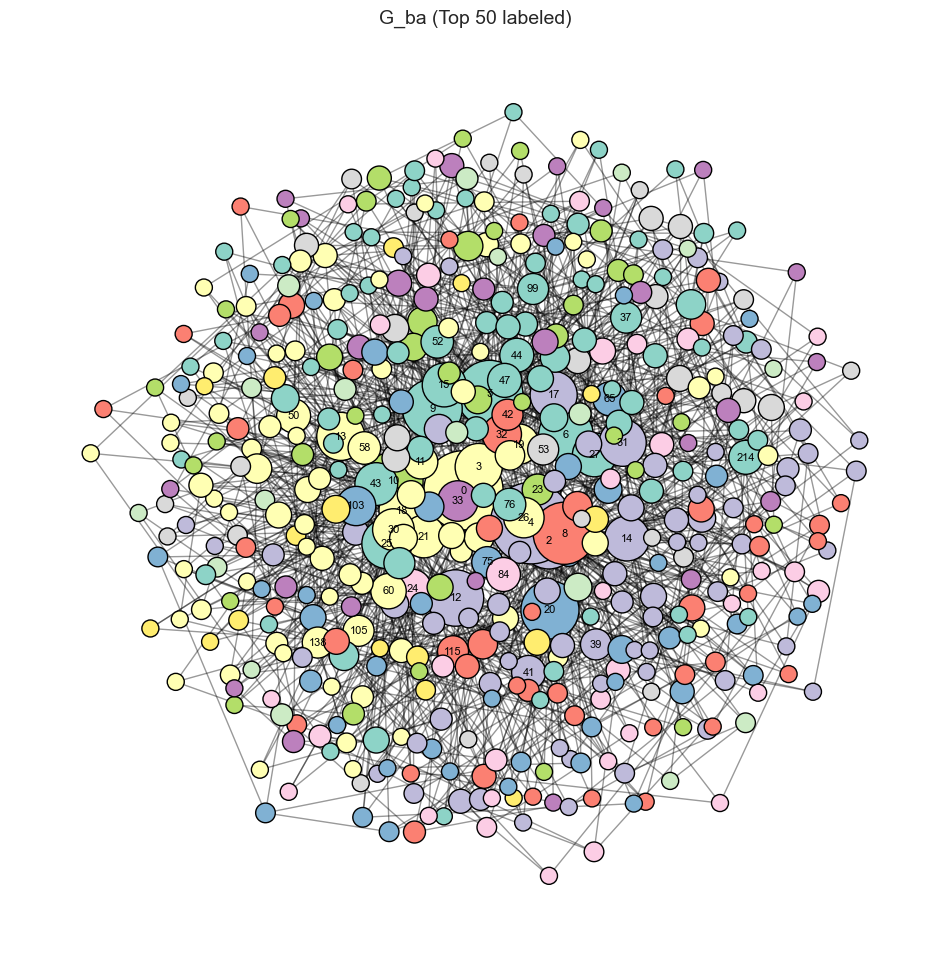

In [11]:
pos = nx.kamada_kawai_layout(G_ba)
draw_network(G_ba, "G_ba", pos=pos)